<a href="https://colab.research.google.com/github/tanmaybohra/Appliances-Energy-Prediction/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let us begin with importing the libraries
import pandas as pd # linear algebra
import numpy as np # data processing
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Copy of data_application_energy.csv")

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [ ]:
# Let us check the shape
df.shape

(19735, 29)

In [ ]:
# Let us see all columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Let us check for duplicates
duplicate = df[df.duplicated()]
duplicate

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2


In [ ]:
# In the statement, we are asked to drop the columns lights, energy use of light fixtures in the house in Wh (Drop this column)
df.drop(['lights'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['date', 'Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
df.shape

(19735, 28)

In [ ]:
# Let us define a function for checking NaN values in the dataset
def dataset_null_info(data_set):
    temp = pd.DataFrame(index=data_set.columns)
    temp['data_type'] = data_set.dtypes
    temp["count of non null values"] = data_set.count()
    temp['NaN values'] = data_set.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(data_set)).round(4)*100
    temp['unique_count'] = data_set.nunique()
    return temp 


In [ ]:
dataset_null_info(df)

,data_type,count of non null values,NaN values,% NaN values,unique_count
date,object,19735,0,0.0,19735
Appliances,int64,19735,0,0.0,92
T1,float64,19735,0,0.0,722
RH_1,float64,19735,0,0.0,2547
T2,float64,19735,0,0.0,1650
RH_2,float64,19735,0,0.0,3376
T3,float64,19735,0,0.0,1426
RH_3,float64,19735,0,0.0,2618
T4,float64,19735,0,0.0,1390
RH_4,float64,19735,0,0.0,2987


We have a clean data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [ ]:
df.describe(include='all')

,date,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-02-01 08:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


Date time year-month-day hour:minute:

Appliances, energy use in Wh (Dependent variable)

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in

RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius

RH8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station),

in Celsius Pressure (from Chievres weather station), in mm Hg

RHout, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station),

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [ ]:
# Let us perform Train-Test Split
from sklearn.model_selection import train_test_split

# 75% of the data is used for the training of the models and the rest is used for testing
train, test = train_test_split(df,test_size=0.25,random_state=40)

**EDA**

In [ ]:
# Let us manage the columns
column_time=["date"]

column_temperature = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

column_humidity = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

column_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg", "Windspeed","Visibility"] 

column_randoms = ["rv1", "rv2"]

column_target = ["Appliances"]

In [ ]:
# Let us now seperate dependent and independent variables 
feature_vars = train[ column_time + column_temperature + column_humidity + column_weather
  + column_randoms ]
target_vars = train[column_target]

In [ ]:
from sklearn import preprocessing, model_selection, metrics

# **Co-relation**

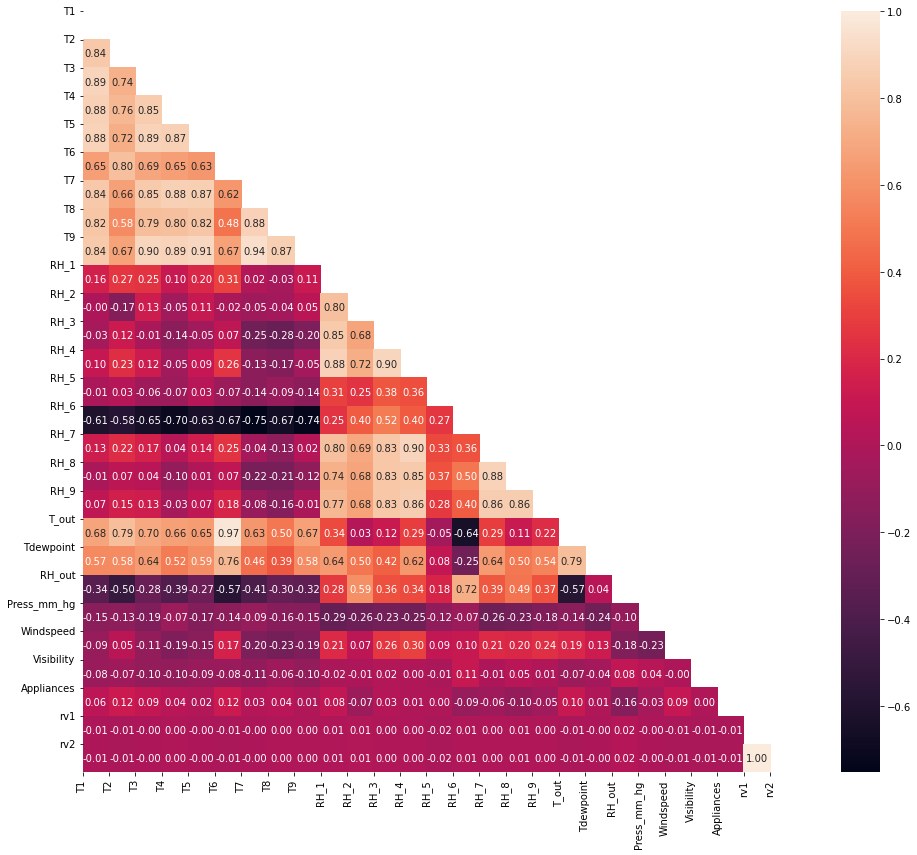

In [ ]:
# Use the weather , temperature , appliances and random column to see the correlation
train_corr = train[column_temperature + column_humidity + column_weather
  + column_target + column_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [ ]:
def get_redundant_pairs(dataframe):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = dataframe.columns
    for i in range(0, dataframe.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(dataframe, n=5):
    au_corr = dataframe.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(dataframe)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974683
T7    T9       0.943921
T5    T9       0.910009
T3    T9       0.900209
RH_3  RH_4     0.899889
RH_4  RH_7     0.895120
T1    T3       0.892292
T4    T9       0.888264
T3    T5       0.887545
RH_7  RH_8     0.884849
T1    T5       0.884692
T7    T8       0.881513
RH_1  RH_4     0.880504
T1    T4       0.876682
T4    T7       0.876677
      T5       0.871733
T5    T7       0.869655
T8    T9       0.868251
RH_7  RH_9     0.860155
RH_4  RH_9     0.858454
RH_8  RH_9     0.857476
T3    T4       0.851790
RH_4  RH_8     0.848829
T3    T7       0.846021
RH_1  RH_3     0.845592
T1    T9       0.842862
      T7       0.837079
      T2       0.835729
RH_3  RH_9     0.834419
      RH_7     0.833924
      RH_8     0.831060
T1    T8       0.824657
T5    T8       0.824057
T2    T6       0.801219
RH_1  RH_7     0.800827
      RH_2     0.797598
T4    T8       0.796458
T3    T8       0.794213
T2    T_out    0.791553
dtype: float64

# **Data Pre-processing**

In [ ]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
train_X.drop(['date'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Boruta algorith for feature selection
!pip install boruta
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from datetime import datetime

X=train_X.values
y=train_y.values
y=y.ravel()

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

rfc = RandomForestRegressor(n_estimators=100, max_depth=6, criterion='mse')
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
start_time = timer(None)
boruta_selector.fit(X, y)
timer(start_time)

     |████████████████████████████████| 56 kB 2.5 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	8 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	9 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	10 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	11 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	12 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	13 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	14 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	15 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	16 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	17 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	18 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	19 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	20 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	21 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	22 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	23 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	24 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	25 / 100
Confirmed: 	20
Tentative: 	3
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	26 / 100
Confirmed: 	21
Tentative: 	2
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	27 / 100
Confirmed: 	21
Tentative: 	2
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	28 / 100
Confirmed: 	21
Tentative: 	2
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	29 / 100
Confirmed: 	21
Tentative: 	2
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	30 / 100
Confirmed: 	21
Tentative: 	2
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	31 / 100
Confirmed: 	21
Tentative: 	2
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	32 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	33 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	34 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	35 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	36 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	37 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	38 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	39 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	40 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	41 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	42 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	43 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	44 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	45 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	46 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	47 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	48 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	49 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	50 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	51 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	52 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	53 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	54 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	55 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	56 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	57 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	58 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	59 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	60 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	61 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	62 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	63 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	64 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	65 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	66 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	67 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	68 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	69 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	70 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	71 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	72 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	73 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	74 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	75 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	76 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	77 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	78 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	79 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	80 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	81 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	82 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	83 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	84 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	85 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	86 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	87 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	88 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	89 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	90 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	91 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	92 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	93 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	94 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	95 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	96 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	97 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	98 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 	99 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	22
Tentative: 	1
Rejected: 	3

 Time taken: 0 hours 39 minutes and 5.19 seconds.


In [ ]:
boruta_selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False])

In [ ]:
boruta_selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 3, 5, 4])

In [ ]:
#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [ ]:
# Due to conlusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

# Due to conlusion made above below columns are removed
test_X.drop(["rv1","rv2","Visibility","T6","T9","date"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [ ]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + column_target ]

test = test[list(test_X.columns.values) + column_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [ ]:
sc_train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,-1.234796,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,-0.009491,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,1.045908,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,-0.852893,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,2.332439,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,-0.464759


In [ ]:
sc_test.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
6314,-0.678526,-0.337714,-0.758967,-0.272083,-0.811540,-0.409392,-0.946375,-0.352449,-0.426736,0.306431,-0.401012,-0.143165,1.086122,-0.407472,-0.731388,-0.437093,-0.232839,-1.157146,-1.318014,0.377392,-0.809142,-0.367942
12257,0.814344,0.289201,1.432662,0.317741,1.062631,0.811654,1.049857,0.671740,1.084770,-0.220306,0.536605,2.416950,-1.056634,-0.276865,-0.989635,-0.554766,0.865496,0.485626,-0.967649,-0.401660,0.004891,3.087003
6271,-0.850621,-1.058130,-0.526796,-0.515812,-0.654758,-0.600348,-0.929458,-0.182731,0.160016,0.427270,-0.182312,0.788775,0.869462,0.702690,0.538598,0.705174,-1.611203,-1.275901,1.191050,0.616061,-0.876978,-0.664080
18179,0.938750,0.485399,0.955147,1.146419,1.134714,1.502863,1.400044,-0.419664,-0.511502,-0.885589,-0.687958,-1.035579,-1.365905,-0.346975,-0.678579,-1.043214,0.591690,0.568755,-0.323430,0.701622,-1.216158,-0.565367
9661,0.005706,-0.368370,-0.396714,-0.137220,-0.595289,-0.270881,0.339334,-0.797748,-0.320955,-1.037265,-1.182747,-0.564532,0.039148,-1.025548,-1.028276,-1.198139,-0.307513,-0.001268,0.524227,0.917775,0.004891,0.224334


In [ ]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [ ]:
train_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,-1.234796,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,-0.009491,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,1.045908,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,-0.852893,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,2.332439,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602


In [ ]:
train_y.head()

9544    -0.270443
19366   -0.464759
10816    0.021032
15457   -0.561918
2956    -0.464759
Name: Appliances, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

models = [
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()]
]

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [ ]:
model_data

[{'Name': 'RandomForest ',
  'Test_R2_Score': 0.5557145977210723,
  'Test_RMSE_Score': 0.6665473743695399,
  'Train_R2_Score': 0.9393264177690678,
  'Train_Time': 29.71551275253296},
 {'Name': 'ExtraTreeRegressor :',
  'Test_R2_Score': 0.632617176565367,
  'Test_RMSE_Score': 0.6061211293418446,
  'Train_R2_Score': 1.0,
  'Train_Time': 7.4249045848846436}]

In [ ]:
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,RandomForest,29.715513,0.939326,0.555715,0.666547
1,ExtraTreeRegressor :,7.424905,1.000000,0.632617,0.606121


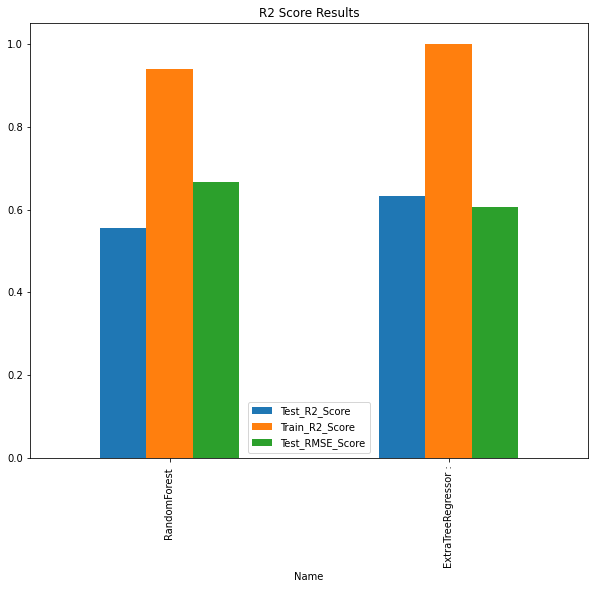

In [ ]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [ ]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 150}

In [ ]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

1.0

In [ ]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.6320200276731016

In [ ]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.6066135279788099

In [ ]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

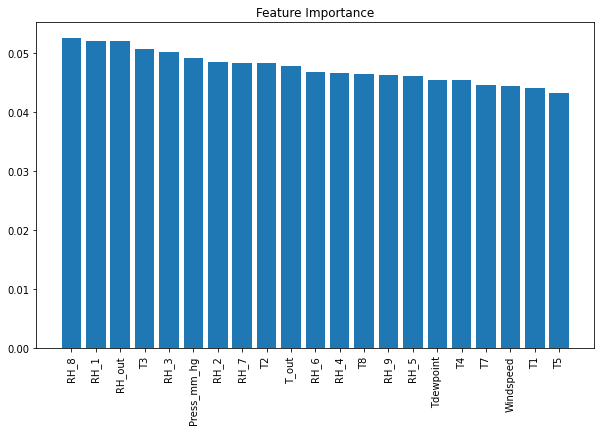

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

# **LSTM**

In [ ]:
from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot

In [ ]:
# convert series to supervised learning
def series_to_supervised(dataset, n_in=1, n_out=1, dropnan=True):
    num_vars = 1 if type(dataset) is list else dataset.shape[1]
    dataframe = DataFrame(dataset)
    cols, names = list(), list()
    
    # input sequence (t-n, ....t-1)
    for i in range(n_in, 0, -1):
        cols.append(dataframe.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]
    # forecast sequence (t, t+1 .... t+n)
    for i in range(0, n_out):
        cols.append(dataframe.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]
    
    # put it all together 
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
feature=["RH_out","RH_8","RH_1","T3","RH_3","T2","Press_mm_hg","RH_2","RH_7","T8","RH_6","RH_4","RH_5","T_out","RH_9",
             "T4","T7","Tdewpoint","Windspeed","T1","T5"]
df1 = df[column_target + column_time + feature]

KeyError: ignored